<a href="https://colab.research.google.com/github/aumshah/Simple-Neural-Network/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
#Imports Useful Packages such as numpy and matplotlib
import random
import matplotlib.pyplot as plt

In [121]:
# Main Neural Network Class
class NeuralNetwork():
  def __init__(self, x_data, y_data):
    self.x_data = x_data
    self.y_data = y_data
    self.datalength = len(self.x_data)
    # Makes sure input data and output data have the same length
    if len(x_data) != len(y_data):
      raise Exception("The arrays have different lengths!")
    
    #Sets a random seed so that the initial weight is the exact same every time (for testing purposes)
    random.seed(3141592653589)
    self.weight = random.uniform(-5,5)
  
  # Simple function that takes an input and feeds it into the neural network. In this case, the
  # Neural Network is very simple with one input and one output with 1 weight and no bias. This
  # makes it easier to find the derivative of the cost function of the Neural Network.
  def feed_forward(self,x):
    return x*self.weight
  
  # This is the cost function of the Neural Network. It uses the feed_forward() function to go
  # get the predicted output. Then, it finds the difference between the actual y value and the
  # predicted output and squares it.
  def cost(self):
    costs = []
    for i, x in enumerate(self.x_data):
      pred = self.feed_forward(x)
      error = (pred - self.y_data[i]) ** 2
      costs.append(error)
    return sum(costs)/len(costs)
  
  # This is the derivative of the cost function using one data point.
  def derivative(self, input, target):
    return ((2*input*input*self.weight) - (2 * input * target)) 

  # This is the training function and the inputs are the learning rate and the number of 
  # epochs. This function uses the derivative function to calculate the derivative of the 
  # cost function with the current value of the weight. It multiplies this value by the 
  # learning rate to get the updated weight. This process is repeated for every element in
  # the dataset for 1 epoch.
  def train(self, learning_rate, epochs):
    # Creates a list that stores all of the costs.
    self.costs = []
    # Plots the graph of the line with the original weight in red.
    data2 = []
    for x in range(self.datalength):
      data2.append(self.weight*x)
    plt.plot(range(self.datalength),data2, color='r')

    # Loops x times where x is the number of epochs
    for iter in range(epochs):
      
      # This is where the main backpropogation occurs. For every datapoint in the dataset,
      # the derivative is calculated and is used to update the weight. The cost is also 
      # calculated and self.costs is updated.
      for i, target in enumerate(self.y_data):
        self.weight = self.weight-(learning_rate*self.derivative(i,target))
        self.costs.append(self.cost())
      # This plots the graph of the new line with the updated weight. For the final line,
      # the color is green.
      data2 = []
      for x in range(self.datalength):
        data2.append(self.weight*x)
      if iter == (epochs-1):
        plt.plot(range(self.datalength),data2,color='g')
      else:
        plt.plot(range(self.datalength),data2,color='b')
    
    # Plots the data points
    plt.scatter(x=self.x_data,y=self.y_data)

    # Shows the trained weight
    print("Trained Weight", self.weight)

    # Shows the plot
    plt.show()
  
  #Shows a plot of the costs
  def graphcost(self):
    plt.plot(range(len(self.costs)),self.costs)
    plt.show()

In [151]:
## Creates the dataset which is a straight line distorted slightly
datasetlength = 10
data_y = []
data_x = range(datasetlength)
for x in range(datasetlength):
  y = x*(random.uniform(8,10))
  data_y.append(y)

Initial Cost: 2172.071007124199
Initial Weight: 0.4554550362634737
Trained Weight 8.754990122512538


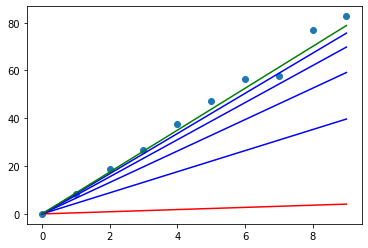

Final Cost: 11.200884766617031


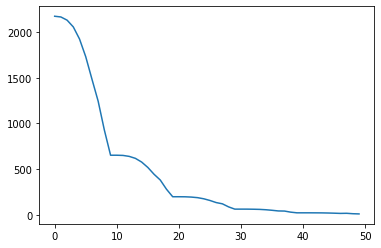

In [152]:
# Creates a Neural Network Object and prints the initial cost and inital display.
N = NeuralNetwork(data_x, data_y)
print("Initial Cost:", N.cost())
print("Initial Weight:", N.weight)

# Trains the Neural Network and prints the final cost.
N.train(learning_rate=0.001, epochs=5)
print("Final Cost:", N.cost())
N.graphcost()